In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Specify the values to be treated as missing
missing_values = ["", "NA", "N/A", "NaN"]

# Replace 'your_file_path.csv' with the actual path to your dataset file
file_path = 'dataset.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path, na_values=missing_values)

# Display the DataFrame
print(df)

# year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun


# Calculate the variance of the 'rain' column
# The variance is a squared measure of how much each individual daily rainfall value deviates from the mean.
# The larger the variance, the more spread out the data points are from the mean. 
# The unit of variance is squared, so it doesn't have the same unit as the original data.
# If you want a measure in the same unit as your original data, you can take the square root of the variance to get the standard deviation.
df['temperature_variance'] = df['meant'].var()

non_numeric_values = df['rain'].loc[~df['rain'].str.isnumeric()]
print("Non-numeric values in 'rain' column:", non_numeric_values)

# Convert the 'rain' column to numeric, handling non-numeric values
df['rain'] = pd.to_numeric(df['rain'], errors='coerce')

# Calculate mean and Z-score
mean_rainfall = df['rain'].mean()
std_dev_rainfall = df['rain'].std()

df['mean_rainfall'] = mean_rainfall
df['z-score'] = (df['rain'] - mean_rainfall) / std_dev_rainfall

min_temp = df['meant'].min()
max_temp = df['meant'].max()


# Specify the window size for the rolling analysis (e.g., 3 days)
window_size = 3

# Perform a rolling mean calculation
df['rolling_mean'] = df['rain'].rolling(window=window_size).mean()


# Specify the overlap size for a hopping window
overlap = 2



# Adjust the index to create overlapping windows
df['hopping_mean'] = df['rolling_mean'].shift(-overlap)


# Display the DataFrame
print(df)








/home/johnos/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/johnos/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


     year  month  meant maxtp mintp  mnmax  mnmin   rain  gmin  wdsp maxgt  \
0    1950      1    5.5  13.3  -5.0    8.3    2.8  102.3  -8.8   9.6    49   
1    1950      2    4.9  12.4  -5.5    8.3    1.5  146.1  -9.3  11.0    53   
2    1950      3    7.7  16.1  -2.8   11.8    3.6   62.5  -5.0   8.9    45   
3    1950      4    7.2  14.9  -2.8   10.7    3.7   99.4  -7.0  12.2    55   
4    1950      5   11.1  23.0   1.1   16.2    6.1   17.1  -3.1   9.1    44   
..    ...    ...    ...   ...   ...    ...    ...    ...   ...   ...   ...   
879  2023      7   14.5  21.8   5.5   18.0   11.0  173.0   2.4   7.7    40   
880  2023      8   15.3  24.3   6.2   18.9   11.6  109.0   2.8   7.5    37   
881  2023      9   14.2  27.4   3.7   18.6    9.9  121.7   0.7   6.8    34   
882  2023     10   11.0  20.7   0.5   14.2    7.7  136.7  -2.6   7.1    30   
883  2023     11    7.5  13.4  -2.6   10.5    4.4  125.5  -5.4   7.3    50   

       sun  
0     48.1  
1     64.2  
2    122.2  
3    136.4 

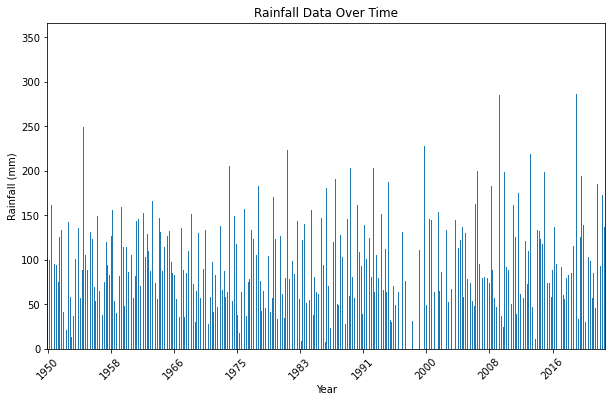

In [2]:
import matplotlib.pyplot as plt
# Plotting the bar chart
df.plot(x='year', y='rain', kind='bar', figsize=(10, 6), legend=False)

# Adjusting x-axis labels to every nth item (e.g., every 2nd item)
n = 100
plt.xticks(range(0, len(df), n), df['year'].iloc[::n], rotation=45) # df['year'].iloc[::n]: This selects every nth year from the 'year' column of the DataFrame.

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Data Over Time')




# Display the plot
plt.show()

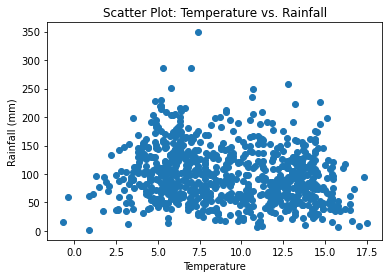

In [3]:

plt.scatter(df['meant'], df['rain'])
plt.xlabel('Temperature')
plt.ylabel('Rainfall (mm)')
plt.title('Scatter Plot: Temperature vs. Rainfall')




plt.show()

In [4]:
import pandas as pd
import numpy as np

# Generate time values at 10-millisecond intervals
time_values = pd.date_range(start='2023-01-01', periods=1000, freq='10L')  # '10L' stands for 10 milliseconds

# Generate DC voltage levels with occasional dips to 2 volts
voltage_levels = np.random.choice([5, 2], size=len(time_values), p=[0.99, 0.01])

# Create a DataFrame
df_voltage = pd.DataFrame({'Time': time_values, 'Voltage': voltage_levels})

# Display the DataFrame
print(df_voltage)

#df_voltage.to_csv("voltage_data.csv", index=False)

                       Time  Voltage
0   2023-01-01 00:00:00.000        5
1   2023-01-01 00:00:00.010        5
2   2023-01-01 00:00:00.020        5
3   2023-01-01 00:00:00.030        5
4   2023-01-01 00:00:00.040        5
..                      ...      ...
995 2023-01-01 00:00:09.950        5
996 2023-01-01 00:00:09.960        5
997 2023-01-01 00:00:09.970        5
998 2023-01-01 00:00:09.980        5
999 2023-01-01 00:00:09.990        5

[1000 rows x 2 columns]


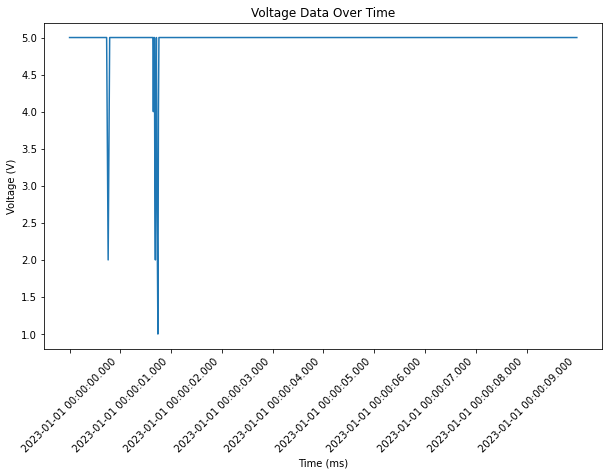

In [5]:

df_voltage = pd.read_csv("voltage_data.csv", na_values=missing_values)
mean_voltage = df_voltage['Voltage'].mean()
df_voltage['variance'] = df_voltage['Voltage'] - mean_voltage
df_voltage.plot(x='Time', y='Voltage', kind='line', figsize=(10, 6), legend=False)
plt.xticks(range(0, len(df_voltage), n), df_voltage['Time'].iloc[::n], rotation=45)
# Adding labels and title
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.title('Voltage Data Over Time')

# Display the plot
plt.show()

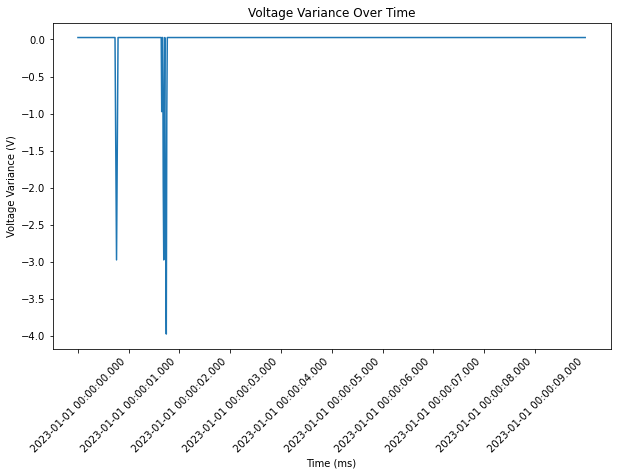

                        Time  Voltage  variance
0    2023-01-01 00:00:00.000        5     0.026
1    2023-01-01 00:00:00.010        5     0.026
2    2023-01-01 00:00:00.020        5     0.026
3    2023-01-01 00:00:00.030        5     0.026
4    2023-01-01 00:00:00.040        5     0.026
..                       ...      ...       ...
995  2023-01-01 00:00:09.950        5     0.026
996  2023-01-01 00:00:09.960        5     0.026
997  2023-01-01 00:00:09.970        5     0.026
998  2023-01-01 00:00:09.980        5     0.026
999  2023-01-01 00:00:09.990        5     0.026

[1000 rows x 3 columns]


In [6]:
df_voltage.plot(x='Time', y='variance', kind='line', figsize=(10, 6), legend=False)
plt.xticks(range(0, len(df_voltage), n), df_voltage['Time'].iloc[::n], rotation=45)
# Adding labels and title
plt.xlabel('Time (ms)')
plt.ylabel('Voltage Variance (V)')
plt.title('Voltage Variance Over Time')

# Display the plot
plt.show()

print(df_voltage)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot,norm
import seaborn as sns
import numpy.ma as ma
from sklearn.cluster import KMeans

# Specify the values to be treated as missing
missing_values = ["", "NA", "N/A", "NaN"]


file_path = 'dataset.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path, na_values=missing_values)
# Convert the 'rain' column to numeric, handling non-numeric values
# df['rain'] = pd.to_numeric(df['rain'], errors='coerce')
# Convert blank spaces to numeric for all columns
df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))
                 
                 
# Display the DataFrame
print(df)

# year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun


/tmp/ipykernel_1716916/1692302215.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))


     year  month  meant  maxtp  mintp  mnmax  mnmin   rain  gmin  wdsp  maxgt  \
0    1950      1    5.5   13.3   -5.0    8.3    2.8  102.3  -8.8   9.6   49.0   
1    1950      2    4.9   12.4   -5.5    8.3    1.5  146.1  -9.3  11.0   53.0   
2    1950      3    7.7   16.1   -2.8   11.8    3.6   62.5  -5.0   8.9   45.0   
3    1950      4    7.2   14.9   -2.8   10.7    3.7   99.4  -7.0  12.2   55.0   
4    1950      5   11.1   23.0    1.1   16.2    6.1   17.1  -3.1   9.1   44.0   
..    ...    ...    ...    ...    ...    ...    ...    ...   ...   ...    ...   
879  2023      7   14.5   21.8    5.5   18.0   11.0  173.0   2.4   7.7   40.0   
880  2023      8   15.3   24.3    6.2   18.9   11.6  109.0   2.8   7.5   37.0   
881  2023      9   14.2   27.4    3.7   18.6    9.9  121.7   0.7   6.8   34.0   
882  2023     10   11.0   20.7    0.5   14.2    7.7  136.7  -2.6   7.1   30.0   
883  2023     11    7.5   13.4   -2.6   10.5    4.4  125.5  -5.4   7.3   50.0   

       sun  
0     48.1  
1

     year  month  meant  maxtp  mintp  mnmax  mnmin   rain  gmin  wdsp  maxgt  \
0    1950      1    5.5   13.3   -5.0    8.3    2.8  102.3  -8.8   9.6   49.0   
1    1950      2    4.9   12.4   -5.5    8.3    1.5  146.1  -9.3  11.0   53.0   
2    1950      3    7.7   16.1   -2.8   11.8    3.6   62.5  -5.0   8.9   45.0   
3    1950      4    7.2   14.9   -2.8   10.7    3.7   99.4  -7.0  12.2   55.0   
4    1950      5   11.1   23.0    1.1   16.2    6.1   17.1  -3.1   9.1   44.0   
..    ...    ...    ...    ...    ...    ...    ...    ...   ...   ...    ...   
879  2023      7   14.5   21.8    5.5   18.0   11.0  173.0   2.4   7.7   40.0   
880  2023      8   15.3   24.3    6.2   18.9   11.6  109.0   2.8   7.5   37.0   
881  2023      9   14.2   27.4    3.7   18.6    9.9  121.7   0.7   6.8   34.0   
882  2023     10   11.0   20.7    0.5   14.2    7.7  136.7  -2.6   7.1   30.0   
883  2023     11    7.5   13.4   -2.6   10.5    4.4  125.5  -5.4   7.3   50.0   

       sun  temperature_var

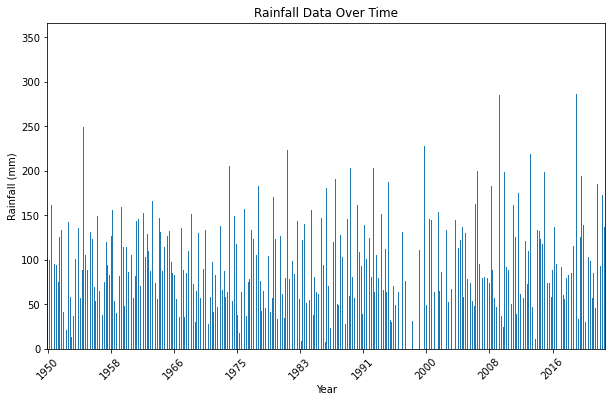

In [8]:
# Calculate the variance of the 'rain' column
# The variance is a squared measure of how much each individual daily rainfall value deviates from the mean.
# The larger the variance, the more spread out the data points are from the mean. 
# The unit of variance is squared, so it doesn't have the same unit as the original data.
# If you want a measure in the same unit as your original data, you can take the square root of the variance to get the standard deviation.
df['temperature_variance'] = df['meant'].var()





# Calculate mean and Z-score
mean_rainfall = df['rain'].mean()
std_dev_rainfall = df['rain'].std()

df['mean_rainfall'] = mean_rainfall
df['z-score'] = (df['rain'] - mean_rainfall) / std_dev_rainfall

min_temp = df['meant'].min()
max_temp = df['meant'].max()


# Specify the window size for the rolling analysis (e.g., 3 days)
window_size = 3

# Perform a rolling mean calculation
df['rolling_mean'] = df['rain'].rolling(window=window_size).mean()


# Specify the overlap size for a hopping window
overlap = 2



# Adjust the index to create overlapping windows
df['hopping_mean'] = df['rolling_mean'].shift(-overlap)


# Display the DataFrame
print(df)


# Plotting the bar chart
df.plot(x='year', y='rain', kind='bar', figsize=(10, 6), legend=False)

# Adjusting x-axis labels to every nth item (e.g., every 2nd item)
n = 100
plt.xticks(range(0, len(df), n), df['year'].iloc[::n], rotation=45) # df['year'].iloc[::n]: This selects every nth year from the 'year' column of the DataFrame.

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Data Over Time')


# Save the plot as a PNG file
plt.savefig('rainfall_plot.png')

# Display the plot
plt.show()

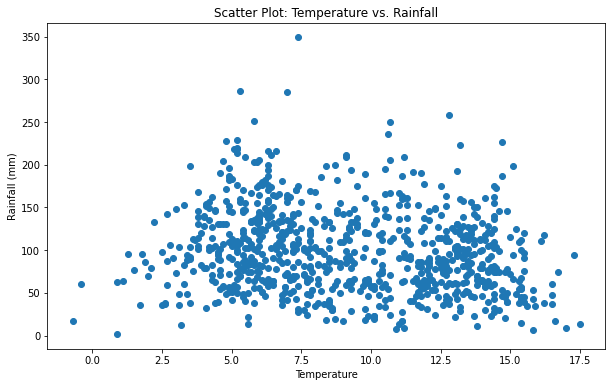

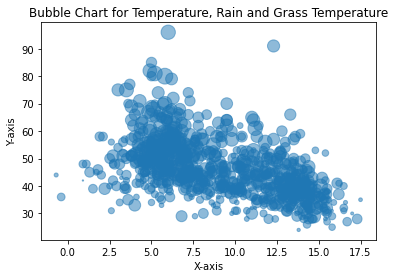

In [9]:
plt.figure(figsize=(10, 6))

plt.scatter(df['meant'], df['rain'])
plt.xlabel('Temperature')
plt.ylabel('Rainfall (mm)')
plt.title('Scatter Plot: Temperature vs. Rainfall')

# Save the plot as a PNG file
plt.savefig('rainfall_temperature_plot.png')
# Display the plot
plt.show()


# Plotting the bubble chart
plt.scatter(df['meant'], df['maxgt'], s=df['rain'], alpha=0.5)

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Bubble Chart for Temperature, Rain and Grass Temperature')

# Save the plot as a PNG file
plt.savefig('bubble_chart.png')

# Display the plot
plt.show()




In [ ]:
plt.figure(figsize=(10, 6))

# Extract the 'rain' column
rain_data = df['rain']

# Remove non-finite values (NaN and infinite)
rain_data = rain_data[np.isfinite(rain_data)]


# Create a Q-Q plot for the 'rain' data
probplot(rain_data, dist="norm", plot=plt)
plt.title("Q-Q Plot for Rain Data - Test for Normal Distribution")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('q_q_plot.png')

# Show the plot
plt.show()


# Plot a histogram
plt.figure(figsize=(10, 6))
sns.histplot(rain_data, bins=20, kde=False, color='blue', stat='density', element='step')

# Fit a normal distribution to the data
mu, std = norm.fit(rain_data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
# Save the plot as a PNG file
plt.savefig('histogram.png')
plt.plot(x, p, 'k', linewidth=2) # x: This is the array of x-values (independent variable) where the line will be plotted. p: This is the array of y-values (dependent variable) specifying the height of the line at each x-value. 'k': This is a format string specifying the color and line style of the plot. In this case, 'k' stands for black. Matplotlib uses a variety of format strings to control the appearance of the plot, and 'k' is a shorthand for a solid black line.

# Draw a vertical line at the mean
plt.axvline(mu, color='red', linestyle='dashed', linewidth=2, label='Mean') # draw a vertical dashed line at the mean of the distribution (mu). 


# Calculate points at ±3 standard deviations
number_of_std_devs = 3
lower_limit = mu - number_of_std_devs * std
upper_limit = mu + number_of_std_devs * std

# Draw vertical lines at ±3 standard deviations
plt.axvline(lower_limit, color='green', linestyle='dashed', linewidth=2, label='-3 Std Dev')
plt.axvline(upper_limit, color='green', linestyle='dashed', linewidth=2, label='+3 Std Dev')

# Calculate points at ±1 standard deviations
number_of_std_devs = 1
lower_limit = mu - number_of_std_devs * std
upper_limit = mu + number_of_std_devs * std

# Draw vertical lines at ±3 standard deviations
plt.axvline(lower_limit, color='blue', linestyle='dashed', linewidth=2, label='-3 Std Dev')
plt.axvline(upper_limit, color='blue', linestyle='dashed', linewidth=2, label='+3 Std Dev')


# Customize the plot
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency,Density')

# Save the plot as a PNG file
plt.savefig('normal_distribution_plot.png')

# Show the plot
plt.show()


plt.figure(figsize=(12, 8))

heatmap_data = df.pivot(index='year', columns='month', values='rain')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Rainfall Heatmap')

# Save the plot as a PNG file
plt.savefig('heatmap.png')
# Show the plot
plt.show()

# Extract relevant columns (temperature and rainfall)
temperature_column = df['meant']  # You can use 'maxtp', 'mintp', or other temperature columns
rainfall_column = df['rain']

# Create masked arrays to handle NaN values
temperature_masked = ma.masked_invalid(temperature_column)
rainfall_masked = ma.masked_invalid(rainfall_column)

# Calculate the covariance between temperature and rainfall
covariance_temperature_rainfall = np.ma.cov(temperature_masked, rainfall_masked, allow_masked=True)[0, 1]

# Print the result
print(f'Covariance between temperature and rainfall: {covariance_temperature_rainfall}')


# Calculate the correlation coefficient
correlation_coefficient = np.ma.corrcoef(temperature_masked, rainfall_masked, allow_masked=True)[0, 1]


# Print the result
print(f'Correlation coefficient between temperature and rainfall: {correlation_coefficient}')


plt.figure(figsize=(12, 8))




In [10]:
rain_data = df['rain']

# Calculate mean and standard deviation
mean_rain = rain_data.mean()
std_rain = rain_data.std()

# Define a threshold for outliers (e.g., 3 standard deviations)
threshold = mean_rain + 3 * std_rain

# Identify outliers
outliers = df[df['rain'] > threshold]

# Print or analyze the outliers
print("Outliers greater than 3 standard deviations:")
print(outliers)

Outliers greater than 3 standard deviations:
     year  month  meant  maxtp  mintp  mnmax  mnmin   rain  gmin  wdsp  maxgt  \
57   1954     10   10.7   17.7   -1.1   14.0    7.5  249.4  -2.9  10.5   45.0   
427  1985      8   12.8   18.9    6.4   16.2    9.3  258.6   3.0  11.3   45.0   
481  1990      2    5.8   12.9   -4.3    8.9    2.6  251.2  -7.5  15.0   80.0   
716  2009     11    7.0   13.1   -2.9    9.9    4.1  285.4  -4.9   9.5   47.0   
788  2015     12    7.4   14.0   -1.2   10.4    4.4  348.9  -4.2  11.5   52.0   
838  2020      2    5.3   11.6   -0.8    8.6    2.1  286.4  -5.6  12.1   53.0   

      sun  temperature_variance  mean_rainfall   z-score  rolling_mean  \
57   68.7              14.17027      98.901667  3.082835    166.966667   
427  82.1              14.17027      98.901667  3.271289    134.066667   
481  47.2              14.17027      98.901667  3.119706    186.300000   
716   NaN              14.17027      98.901667  3.820265    139.833333   
788   NaN        

/home/johnos/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0      0
1      4
2      3
3      0
4      1
      ..
879    9
880    0
881    5
882    5
883    5
Name: cluster, Length: 840, dtype: int32


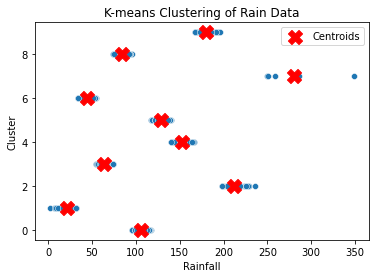

In [14]:
# Extract 'rain' column for clustering
X = df[['rain']] # In Pandas, double brackets [['rain']] are used to create a DataFrame with a single column. The double brackets are used to create a DataFrame with a single column, rather than extracting the column as a Pandas Series. The reason for using double brackets in this context is that certain operations and methods in scikit-learn or other libraries might expect input features to be in the form of a DataFrame, even if there's only one column. Using double brackets ensures that you maintain a DataFrame structure. For example, when using scikit-learn for machine learning, the fit method typically expects the input features to be a 2D array-like object.
X = X.dropna(subset=['rain']) # Exclude NaN from Clustering
df = df.loc[X.index]
number_of_clusters = 10
# Create a KMeans model with n clusters
# the random_state parameter is used to initialize the centroid locations. The random_state parameter serves as a seed for the random number generator that the algorithm uses during its initialization.

# Setting a specific random_state ensures reproducibility of results.
# If you use the same random_state value across different runs, you should get the same initial centroids,
# and consequently, you should get the same clustering results, provided other conditions (such as the input data) remain unchanged.
kmeans = KMeans(n_clusters=number_of_clusters, random_state=42)

# Fit the model and predict the clusters
df['cluster'] = kmeans.fit_predict(X)

print(df['cluster'])
# Scatter plot to visualize the clusters
sns.scatterplot(x='rain', y='cluster', data=df, palette='viridis', marker='o')

# Display the centroids
plt.scatter(kmeans.cluster_centers_, range(number_of_clusters), color='red', marker='X', s=200, label='Centroids')

# Customize the plot
plt.title('K-means Clustering of Rain Data')
plt.xlabel('Rainfall')
plt.ylabel('Cluster')
plt.legend()

# Show the plot
plt.show()

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Clean the data, replace non mumber values with the mean
df = df.fillna(df.mean())

# Define predictor variables (X) and the target variable (y)
X = df[['meant', 'maxtp', 'mintp', 'mnmax', 'mnmin', 'gmin', 'wdsp', 'maxgt', 'sun']]
y = df['rain']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model coefficients and evaluation metrics
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Coefficients:

# Each coefficient represents the change in the target variable (dependent variable) for a one-unit change in the corresponding feature (independent variable), while keeping other features constant.
# For example, a coefficient of 51.8177 for the first feature means that, on average, a one-unit increase in that feature is associated with an increase of approximately 51.82 units in the target variable.
# Intercept:

# The intercept represents the predicted value of the target variable when all independent variables are zero.
# In this case, when all features are zero, the predicted value of the target variable is approximately 80.14.
# Mean Squared Error (MSE):

# The MSE is a measure of how well the model's predictions match the actual values.
# Lower MSE values indicate better model performance, and it represents the average squared difference between the predicted values and the actual values.
# R-squared (R²):

# R-squared is a measure of how well the independent variables explain the variability in the dependent variable.
# It ranges from 0 to 1, where 0 indicates that the model does not explain any variability, and 1 indicates perfect explanation.
# In this case, an R-squared of 0.30 (30%) suggests that the model explains approximately 30% of the variability in the target variable.

Coefficients: [ 5.18177332e+01 -2.04377762e+00  1.38940625e+00 -3.43689401e+01
 -1.37278847e+01  2.32015596e-01  4.81756830e+00  1.27576005e+00
 -1.99899128e-02]
Intercept: 80.14481059148908
Mean Squared Error: 1744.856837479092
R-squared: 0.29766704701551816


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Clean the data, replace non mumber values with the mean
df = df.fillna(df.mean())

# Define predictor variables (X) and the target variable (y)
X = df[['meant']]
y = df['maxgt']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model coefficients and evaluation metrics
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)



Coefficients: [-1.36912936]
Intercept: 58.320298213331014
Mean Squared Error: 64.08014608049746
R-squared: 0.2848947660699861


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Clean the data, replace non mumber values with the mean
df = df.fillna(df.mean())


# Assuming 'df' is your DataFrame with weather data
# Create a binary target variable 'rainy' based on a threshold for 'rain'
df['rainy'] = (df['rain'] > 50).astype(int)

# Select features and target variable
features = ['meant', 'maxtp', 'mintp', 'mnmax', 'mnmin', 'gmin', 'wdsp', 'maxgt', 'sun']
X = df[features]
y = df['rainy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
#print(df)
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_report_str)

# Accuracy: 0.8393
# Confusion Matrix:
# [[ 11   8]
#  [ 19 130]]
# Classification Report:
#               precision    recall  f1-score   support

#            0       0.37      0.58      0.45        19
#            1       0.94      0.87      0.91       149

#     accuracy                           0.84       168
#    macro avg       0.65      0.73      0.68       168
# weighted avg       0.88      0.84      0.85       168

# The accuracy is the ratio of correctly predicted instances to the total instances.
# In this case, the classifier achieved an accuracy of approximately 83.93%. 
# It suggests that the model is correct in its predictions about 83.93% of the time.

# - Precision: For class 0 (non-rainy), precision is 0.37, indicating that among the instances predicted as non-rainy, only 37% were actually non-rainy. For class 1 (rainy), precision is 0.94, suggesting that among the instances predicted as rainy, 94% were actually rainy.
# - Recall: For class 0, recall is 0.58, indicating that 58% of actual non-rainy instances were correctly predicted. For class 1, recall is 0.87, meaning that 87% of actual rainy instances were correctly predicted.
# - F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
# - Support: The number of instances for each class in the test set.

# The model has good overall accuracy, but there is room for improvement, especially in precision and recall for class 0 (non-rainy). Depending on your specific use case, you might want to further optimize the model or consider different evaluation metrics.


Accuracy: 0.8393
Confusion Matrix:
[[ 11   8]
 [ 19 130]]
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.58      0.45        19
           1       0.94      0.87      0.91       149

    accuracy                           0.84       168
   macro avg       0.65      0.73      0.68       168
weighted avg       0.88      0.84      0.85       168

